# DECISION TREE

- is another method we can use for finding relationship between target and one or more predictors
- decision trees can be used for both categorical and continous targets (so both classification and regression tasks -  today we'll be focusing on regression trees)
- the main idea is to create a tree of decisions that best partitions the data 
- creating a tree involves deciding on which features to split the data and what conditions to use for splitting, as well as with knowing when to stop


In [23]:
import pandas as pd
import numpy as np
import json
import graphviz
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split

pd.set_option("display.max_rows",6)

%matplotlib inline

In [24]:
df_data = pd.read_csv(r'varsom_ml_preproc_3y.csv', index_col=0)

target_ = 'danger_level'
X = df_data.drop([target_, 'date'], axis=1)
y = df_data.filter([target_], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 222, test_size = 0.3)

In [25]:
print(df_data.columns.values)
df_data.describe()

['avalanche_problem_1_cause_id'
 'avalanche_problem_1_destructive_size_ext_id'
 'avalanche_problem_1_distribution_id'
 'avalanche_problem_1_exposed_height_1'
 'avalanche_problem_1_exposed_height_2' 'avalanche_problem_1_ext_id'
 'avalanche_problem_1_probability_id' 'avalanche_problem_1_problem_id'
 'avalanche_problem_1_problem_type_id'
 'avalanche_problem_1_trigger_simple_id' 'avalanche_problem_1_type_id'
 'avalanche_problem_2_cause_id'
 'avalanche_problem_2_destructive_size_ext_id'
 'avalanche_problem_2_distribution_id'
 'avalanche_problem_2_exposed_height_1'
 'avalanche_problem_2_exposed_height_2' 'avalanche_problem_2_ext_id'
 'avalanche_problem_2_probability_id' 'avalanche_problem_2_problem_id'
 'avalanche_problem_2_problem_type_id'
 'avalanche_problem_2_trigger_simple_id' 'avalanche_problem_2_type_id'
 'avalanche_problem_3_cause_id'
 'avalanche_problem_3_destructive_size_ext_id'
 'avalanche_problem_3_distribution_id'
 'avalanche_problem_3_exposed_height_1'
 'avalanche_problem_3_expo

,avalanche_problem_1_cause_id,avalanche_problem_1_destructive_size_ext_id,avalanche_problem_1_distribution_id,avalanche_problem_1_exposed_height_1,avalanche_problem_1_exposed_height_2,avalanche_problem_1_ext_id,avalanche_problem_1_probability_id,avalanche_problem_1_problem_id,avalanche_problem_1_problem_type_id,avalanche_problem_1_trigger_simple_id,...,mountain_weather_wind_direction_E,mountain_weather_wind_direction_N,mountain_weather_wind_direction_NE,mountain_weather_wind_direction_NW,mountain_weather_wind_direction_None,mountain_weather_wind_direction_Not given,mountain_weather_wind_direction_S,mountain_weather_wind_direction_SE,mountain_weather_wind_direction_SW,mountain_weather_wind_direction_W
count,33264.000000,33264.000000,33264.000000,33264.000000,33264.000000,33264.000000,33264.000000,33264.000000,33264.000000,33264.000000,...,33264.000000,33264.000000,33264.000000,33264.000000,33264.000000,33264.000000,33264.000000,33264.000000,33264.000000,33264.000000
mean,7.504990,1.160955,1.012145,335.918711,34.704185,10.563672,1.642496,0.536195,7.453523,10.168951,...,0.027718,0.012205,0.013949,0.027898,0.004630,0.690536,0.034392,0.097042,0.051166,0.040464
std,7.876866,1.170598,1.026995,401.052501,150.560137,9.951452,1.561384,0.498696,10.807930,10.027306,...,0.164165,0.109803,0.117281,0.164683,0.067885,0.462280,0.182235,0.296019,0.220340,0.197048
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50%,10.000000,1.000000,1.000000,200.000000,0.000000,15.000000,3.000000,1.000000,5.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,13.000000,2.000000,2.000000,600.000000,0.000000,20.000000,3.000000,1.000000,10.000000,21.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,24.000000,4.000000,4.000000,2100.000000,2000.000000,25.000000,5.000000,1.000000,50.000000,22.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [26]:
print(df_data[df_data['danger_level']>3]['region_id'].unique())

[3003 3007 3009 3010 3011 3012 3013 3014 3015 3016 3017 3022 3023 3024
 3027 3029 3031 3034]



# RANDOM FORESTS

- are using Bagging (bootstrap aggregating) algorithm

- **bagging** is an ensemble learning where we build each model using the same algorithm, but we train each learner on different set of data


# GRADIENT BOOSTED TREES

- are using Boosting (Ada Boost) algorithm

- **boosting** is a variation of ensemble trees that strives to improve the learners by focusing on areas where the system is not performing well.



### We can start by creating one decision tree of depth 3 using all features 

In [27]:
dec_tree = tree.DecisionTreeRegressor(random_state=222, max_depth = 3)

dec_tree.fit(X_train, y_train) # we're using the same data as in last linear model

predictions_dt = dec_tree.predict(X_test)
print(predictions_dt.shape, y_test.shape)

(9980,) (9980, 1)


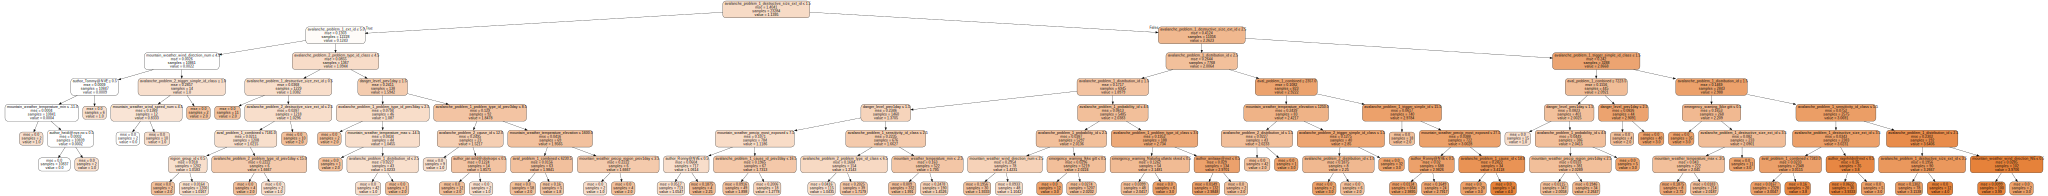

In [34]:
# Visualize the tree
dot_data = tree.export_graphviz(dec_tree, out_file=None, 
                         feature_names=df_data.drop([target_, 'date'], axis=1).columns,   
                         filled=True, rounded=True,  
                         special_characters=True)  

graph = graphviz.Source(dot_data) 
graph.render('aval_danger_by_problem_dt_lev7')
graph 

The first avalanche problem dictates the danger level - that was expected :-)



We need to evaluate our model:

In [35]:
print('Decision tree R^2: %.4f' % dec_tree.score(X_test, y_test)) 

Decision tree R^2: 0.9863


Text(0,0.5,'$R^2$')

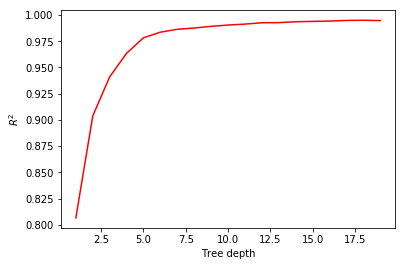

In [36]:
depths = range(1, 20)

tree_models = [tree.DecisionTreeRegressor(random_state=222, max_depth=d).fit(X_train, y_train) for d in depths]
tree_Rsquare = [f.score(X_test, y_test) for f in tree_models]

plt.plot(depths, tree_Rsquare, color = 'red')
plt.xlabel('Tree depth')
plt.ylabel('$R^2$')

Looks like there is little gain when using a depth > 7.

In [37]:
# so let's create a tree with depth = 7

dec_tree = tree.DecisionTreeRegressor(random_state=222, max_depth = 7)

dec_tree.fit(X_train, y_train) # we're using the same data as in last linear model

predictions_dt = dec_tree.predict(X_test)

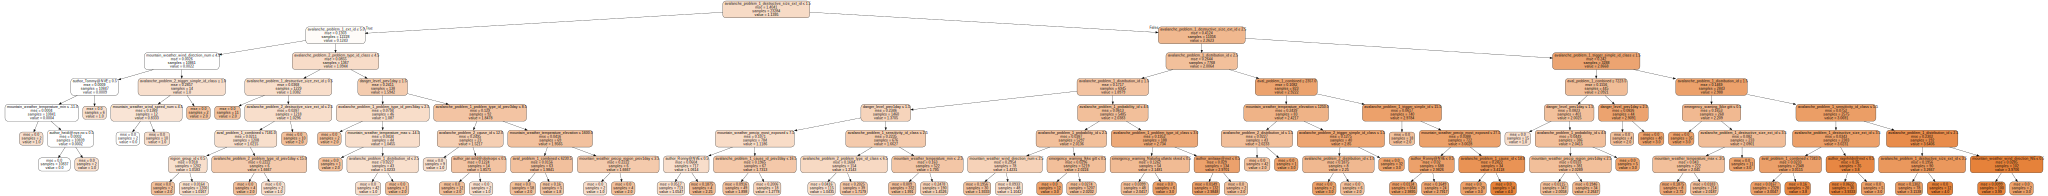

In [38]:
# Visualize the tree
dot_data = tree.export_graphviz(dec_tree, out_file=None, 
                         feature_names=df_data.drop([target_, 'date'], axis=1).columns,   
                         filled=True, rounded=True,  
                         special_characters=True)  

graph = graphviz.Source(dot_data) 
graph.render('aval_danger_by_problem_dt2')
graph 

In [39]:
print('Decision tree R^2: %.4f' % dec_tree.score(X_test, y_test)) 

Decision tree R^2: 0.9863


Now we see slight improvement in $R^{2}$.

Maybe we'll get better results with **random forests** and/or **gradient boosted trees**. 

### Random forest 

In [40]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state = 422, max_depth = 7)
forest_reg.fit(X_train, y_train)

predictions_rf = forest_reg.predict(X_test)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [41]:
print('Random forest R^2: %.4f' % forest_reg.score(X_test, y_test)) 

Random forest R^2: 0.9876


### Gradient boosting

In [42]:
from sklearn.ensemble import GradientBoostingRegressor

grad_boost = GradientBoostingRegressor(random_state = 222, max_depth = 6)

grad_boost.fit(X_train, y_train)

predictions_gb = grad_boost.predict(X_test)

print('Gradient boosted tree R^2: %.4f' % grad_boost.score(X_test, y_test)) 

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Gradient boosted tree R^2: 0.9941


Again, very small difference between random forests and boosted trees.


Last thing we can check is imprtance of variables - if some of the feature are not as useful as the other in explaining the variability in our target variable, we cn exclude them in order to simplify our model. 

In [43]:
feature_labels = np.array(df_data.drop([target_, 'date'], axis=1).columns)
#feature_labels = np.array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'])
importance = forest_reg.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{}-{:.2f}%'.format(feature_labels[index], (importance[index] *100.0)))

mountain_weather_wind_direction_W-0.00%
avalanche_problem_3_trigger_simple_id-0.00%
avalanche_problem_3_type_id-0.00%
author_torolav@obskorps-0.00%
region_type_id-0.00%
author_solveig@NVE-0.00%
avalanche_problem_2_cause_id_prev3day-0.00%
avalanche_problem_2_problem_type_id_prev3day-0.00%
author_martin@svv-0.00%
avalanche_problem_3_trigger_simple_id_class-0.00%
author_magnush@met-0.00%
author_knutinge@svv-0.00%
avalanche_problem_3_problem_id-0.00%
author_Andreas@nve-0.00%
author_EspenN-0.00%
author_HåvardT@met-0.00%
author_Ida@met-0.00%
author_Ingrid@NVE-0.00%
author_John Smits-0.00%
author_Julie@SVV-0.00%
author_Karsten@NVE-0.00%
author_MSA@nortind-0.00%
author_Ragnar@NVE-0.00%
author_ToreV@met-0.00%
author_haso@nve.no-0.00%
author_Espen Granan-0.00%
avalanche_problem_3_probability_id-0.00%
avalanche_problem_2_cause_id_prev1day-0.00%
avalanche_problem_3_exposed_height_2-0.00%
mountain_weather_wind_direction_SE-0.00%
mountain_weather_wind_direction_S-0.00%
mountain_weather_wind_directio

In [44]:
# excluding the variables where impotance is less than 1%

X = df_data[['avalanche_problem_1_distribution_id',
             'avalanche_problem_1_destructive_size_ext_id',
             'avalanche_problem_1_trigger_simple_id',
             'avalanche_problem_1_probability_id',
             'avalanche_problem_2_destructive_size_ext_id',
             'avalanche_problem_2_probability_id']]
y = df_data['danger_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 222)

In [45]:
grad_boost = GradientBoostingRegressor(random_state = 222, max_depth = 7)

grad_boost.fit(X_train, y_train)

predictions_gb = grad_boost.predict(X_test)

In [46]:
print('Gradient boosted tree R^2: %.4f' % grad_boost.score(X_test, y_test)) 

Gradient boosted tree R^2: 0.9839
